/tmp/ipykernel_23465/3462004670.py:29: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy, T_tn)


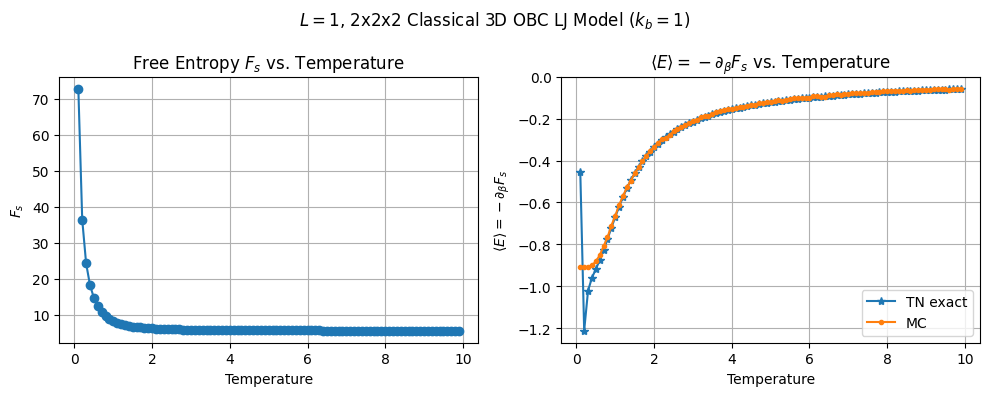

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

N_a = 2
L = 1

# TN

# Read from file
f = open("./3DLJ_2_exact_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T_tn = []
Entropy = []
M = []

for line in lines:
    line_list = line.split(',')
    T_tn.append(float(line_list[0].split('=')[1]))
    Entropy.append(float(line_list[1].split('=')[1].split('\n')[0]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn = np.array(T_tn)
Entropy = np.array(Entropy)
dSdT = scipy.gradient(Entropy, T_tn)
T_sq = T_tn**2

numerical_E = T_sq * dSdT / N_a**3



# MC

# Read from file
f = open(f"./MC/3DLJ_L={L}_N_a={N_a}_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T = []
E = []
M = []

for line in lines:
    if line.split('=')[0] == 'T':
        T.append(float(line.split('=')[1]))
    elif line.split(' ')[0] == 'Energy':
        E.append(float(line.split(' ')[-1]))
    elif line.split(' ')[0] == 'Total':
        M.append(float(line.split(' ')[-1]))



# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(T_tn, Entropy, 'o-', label='OBC')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel(r'$F_s$')
ax[0].set_title(r'Free Entropy $F_s$ vs. Temperature')

ax[1].plot(T_tn, numerical_E, '*-', label='TN exact')
ax[1].plot(T, E, '.-', label='MC')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
ax[1].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. Temperature')
ax[1].legend()

ax[0].grid()
ax[1].grid()

# Add title
fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} Classical 3D OBC LJ Model ($k_b=1$)')

plt.tight_layout()
plt.show()


/tmp/ipykernel_366/2938529740.py:33: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy, T_tn)
/tmp/ipykernel_366/2938529740.py:58: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)


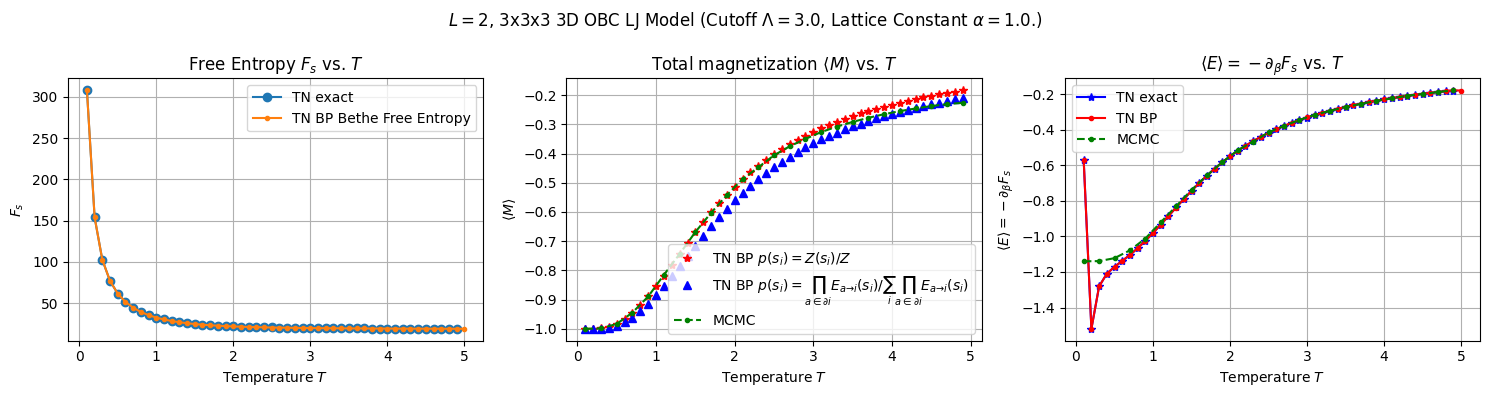

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

N_a = 3
L = 2

cutoff = 3.0  # Cutoff distance for LJ potential
epsilon = 1.0  # Depth of the potential well/ Energy scale
sigma = 1.0  # Length scale in LJ potential, also the distance at which the potential becomes zero

# TN Exact

# Read from file
f = open(f"./3DLJ_L={L}_N_a={N_a}_exact_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T_tn = []
Entropy = []
# M = []

for line in lines:
    line_list = line.split(',')
    T_tn.append(float(line_list[0].split('=')[1]))
    Entropy.append(float(line_list[1].split('=')[1].split('\n')[0]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn = np.array(T_tn)
Entropy = np.array(Entropy)
dSdT = scipy.gradient(Entropy, T_tn)
T_sq = T_tn**2

numerical_E = T_sq * dSdT / N_a**3


# TN BP

# Read from file
f = open(f"./3DLJ_L={L}_N_a={N_a}_BP_results.txt", "r")
lines = f.readlines()
f.close()

# Extract data
T_tn_BP = []
Entropy_BP = []

for line in lines:
    line_list = line.split(',')
    T_tn_BP.append(float(line_list[0].split('=')[1]))
    Entropy_BP.append(float(line_list[1].split('=')[1].split('\n')[0]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_BP = np.array(T_tn_BP)
Entropy_BP = np.array(Entropy_BP)
dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
T_sq = T_tn_BP**2

numerical_E_BP = T_sq * dSdT / N_a**3

# Magnetization
# Read from file
f = open(f"./Mag_3DLJ_L={L}_N_a={N_a}_BP_results.txt", "r")
lines = f.readlines()
f.close()

T_mag_BP = []
M_BP = []
M_BP_from_messages = []

for line in lines:
    line_list = line.split('\n')
    if line_list[0] != '':
        T_mag_BP.append(float(line_list[0].split(',')[0].split('=')[1]))
        M_BP.append(float(line_list[0].split(',')[1].split('=')[1]))
        M_BP_from_messages.append(float(line_list[0].split(',')[2].split('=')[1]))
    



# MC

# Read from file
f = open(f"./MC/3DLJ_L={L}_N_a={N_a}_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T = []
E = []
M = []

for line in lines:
    if line.split('=')[0] == 'T':
        T.append(float(line.split('=')[1]))
    elif line.split(' ')[0] == 'Energy':
        E.append(float(line.split(' ')[-1]))
    elif line.split(' ')[0] == 'Total':
        M.append(float(line.split(' ')[-1]))


# Plot
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].plot(T_tn, Entropy, 'o-', label='TN exact')
ax[0].plot(T_tn_BP, Entropy_BP, '.-', label='TN BP Bethe Free Entropy')
ax[0].set_xlabel(r'Temperature $T$')
ax[0].set_ylabel(r'$F_s$')
ax[0].set_title(r'Free Entropy $F_s$ vs. $T$')
ax[0].legend()

ax[2].plot(T_tn, numerical_E, '*-', label='TN exact',color='b')
ax[2].plot(T_tn_BP, numerical_E_BP, '.-', label='TN BP',color='r')
ax[2].plot(T, E, '.--', label='MCMC',color='g')
ax[2].set_xlabel(r'Temperature $T$')
ax[2].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
ax[2].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. $T$')
ax[2].legend()

ax[1].set_xlabel(r'Temperature $T$')
ax[1].set_ylabel(r'$\langle M\rangle$')
ax[1].set_title(r'Total magnetization $\langle M\rangle$ vs. $T$')

# Plot the BP magnetization
ax[1].plot(T_mag_BP, M_BP, '*', color='r', label=r'TN BP $p(s_i)=Z(s_i)/Z$')
ax[1].plot(T_mag_BP, M_BP_from_messages, '^', color='b', label=r'TN BP $p(s_i)=\prod_{a \in \partial i} E_{a\to i}(s_i)/\sum_i \prod_{a \in \partial i} E_{a\to i}(s_i)$')
ax[1].plot(T, -1*np.array(M), '.--', color='g', label='MCMC')
ax[1].legend(loc='lower right')

ax[0].grid()
ax[2].grid()
ax[1].grid()

# Add title
fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} 3D OBC LJ Model (Cutoff $\Lambda = 3.0$, Lattice Constant $\alpha={L/(N_a-1)}$.)')

plt.tight_layout()
plt.savefig(f'./L={L}_{N_a}x{N_a}x{N_a}_MC_BP.pdf')
plt.show()


/tmp/ipykernel_366/313571512.py:30: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)


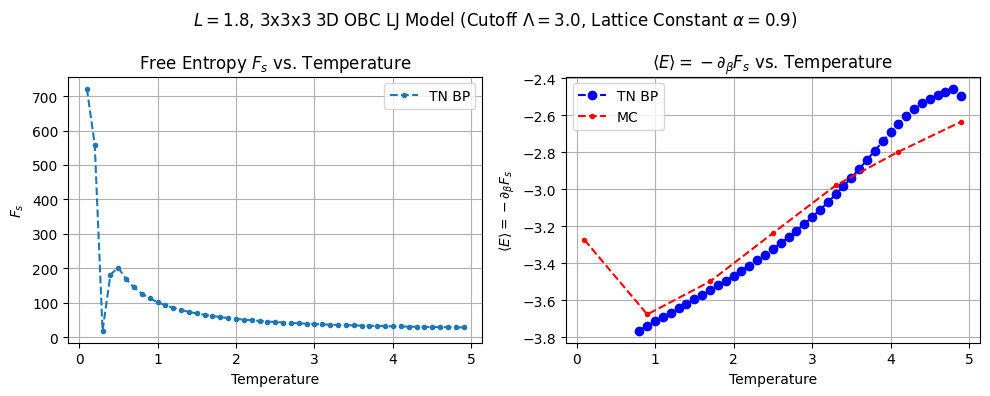

In [194]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

a=0.9
N_a = 3
L = a*(N_a-1)

# TN BP

# Read from file
f = open(f"./3DLJ_L={L}_N_a={N_a}_BP_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T_tn_BP = []
Entropy_BP = []
M = []

for line in lines:
    line_list = line.split(',')
    T_tn_BP.append(float(line_list[0].split('=')[1]))
    Entropy_BP.append(float(line_list[1].split('=')[1].split('\n')[0]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_BP = np.array(T_tn_BP)
Entropy_BP = np.array(Entropy_BP)
dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
T_sq = T_tn_BP**2
numerical_E_BP = T_sq * dSdT / N_a**3



# MC

# Read from file
f = open(f"./MC/3DLJ_L={L}_N_a={N_a}_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T = []
E = []
M = []

for line in lines:
    if line.split('=')[0] == 'T':
        T.append(float(line.split('=')[1]))
    elif line.split(' ')[0] == 'Energy':
        E.append(float(line.split(' ')[-1]))
    elif line.split(' ')[0] == 'Total':
        M.append(float(line.split(' ')[-1]))



# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# ax[0].plot(T_tn_e, Entropy_e, 'o-', label='TN exact')
ax[0].plot(T_tn_BP, Entropy_BP, '.--', label='TN BP')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel(r'$F_s$')
ax[0].set_title(r'Free Entropy $F_s$ vs. Temperature')
ax[0].legend()

n_start = 7
# ax[1].plot(T_tn, numerical_E, '*-', label='TN exact')
ax[1].plot(T_tn_BP[n_start:], numerical_E_BP[n_start:], 'o--', label='TN BP',color='b')
# ax[1].plot(T_tn_e, numerical_E_e, '.-', label='TN exact')
ax[1].plot(T, E, '.--', label='MC',color='r')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
ax[1].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. Temperature')
ax[1].legend()

ax[0].grid()
ax[1].grid()

# Add title
fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} 3D OBC LJ Model (Cutoff $\Lambda = 3.0$, Lattice Constant $\alpha={L/(N_a-1)}$)')

plt.tight_layout()
plt.show()


/tmp/ipykernel_366/1980553012.py:29: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
/tmp/ipykernel_366/1980553012.py:53: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_e, T_tn_e)


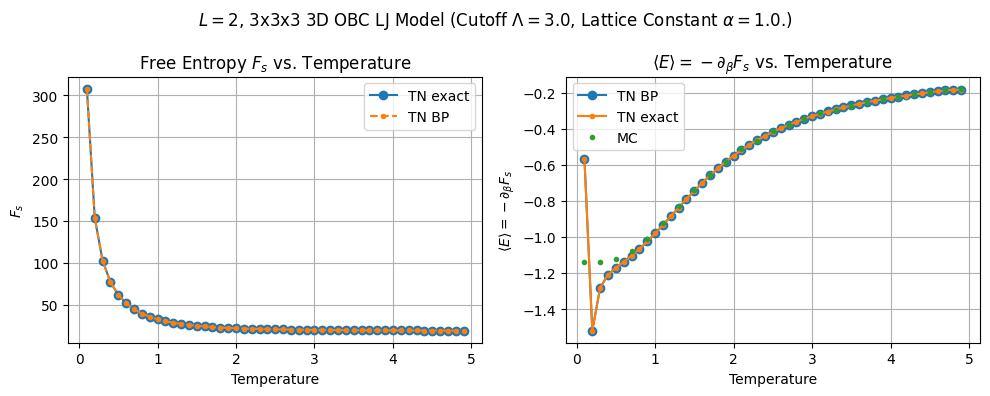

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

N_a = 3
L = 2

# TN BP

# Read from file
f = open(f"./3DLJ_L={L}_N_a={N_a}_BP_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T_tn_BP = []
Entropy_BP = []
M = []

for line in lines:
    line_list = line.split(',')
    T_tn_BP.append(float(line_list[0].split('=')[1]))
    Entropy_BP.append(float(line_list[1].split('=')[1].split('\n')[0]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_BP = np.array(T_tn_BP)
Entropy_BP = np.array(Entropy_BP)
dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
T_sq = T_tn_BP**2
numerical_E_BP = T_sq * dSdT / N_a**3

# TN BP

# Read from file
f = open(f"./3DLJ_L={L}_N_a={N_a}_exact_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T_tn_e = []
Entropy_e = []

for line in lines:
    line_list = line.split(',')
    T_tn_e.append(float(line_list[0].split('=')[1]))
    Entropy_e.append(float(line_list[1].split('=')[1].split('\n')[0]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_e = np.array(T_tn_e)
Entropy_e = np.array(Entropy_e)
dSdT = scipy.gradient(Entropy_e, T_tn_e)
T_sq = T_tn_e**2
numerical_E_e = T_sq * dSdT / N_a**3



# MC

# Read from file
f = open(f"./MC/3DLJ_L={L}_N_a={N_a}_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T = []
E = []
M = []

for line in lines:
    if line.split('=')[0] == 'T':
        T.append(float(line.split('=')[1]))
    elif line.split(' ')[0] == 'Energy':
        E.append(float(line.split(' ')[-1]))
    elif line.split(' ')[0] == 'Total':
        M.append(float(line.split(' ')[-1]))



# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(T_tn_e, Entropy_e, 'o-', label='TN exact')
ax[0].plot(T_tn_BP, Entropy_BP, '.--', label='TN BP')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel(r'$F_s$')
ax[0].set_title(r'Free Entropy $F_s$ vs. Temperature')
ax[0].legend()


# ax[1].plot(T_tn, numerical_E, '*-', label='TN exact')
ax[1].plot(T_tn_BP, numerical_E_BP, 'o-', label='TN BP')
ax[1].plot(T_tn_e, numerical_E_e, '.-', label='TN exact')
ax[1].plot(T, E, '.', label='MC')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
ax[1].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. Temperature')
ax[1].legend()

ax[0].grid()
ax[1].grid()

# Add title
fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} 3D OBC LJ Model (Cutoff $\Lambda = 3.0$, Lattice Constant $\alpha={L/(N_a-1)}$.)')

plt.tight_layout()
plt.show()


/tmp/ipykernel_366/1000157316.py:29: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)


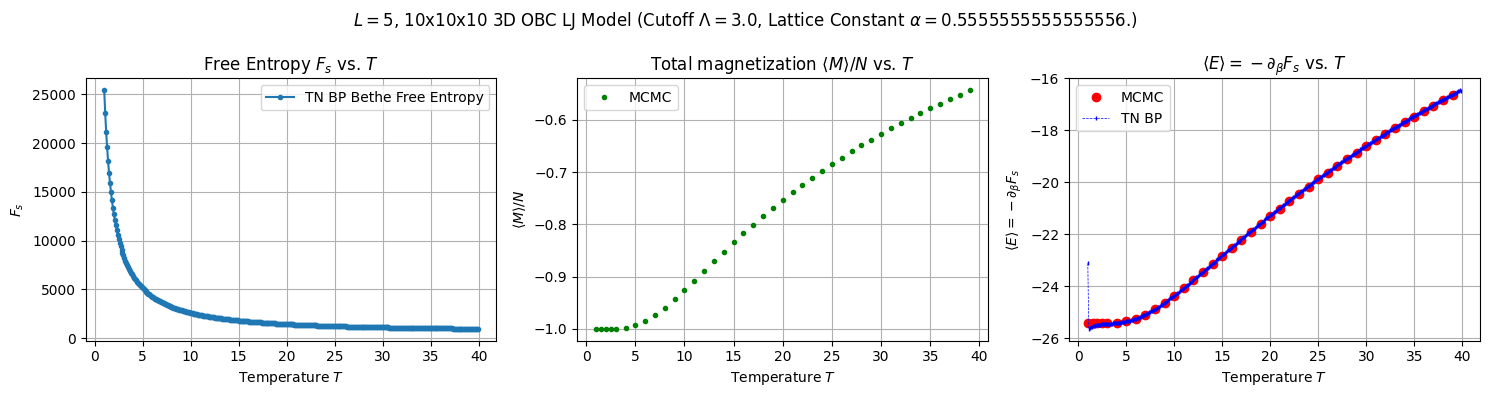

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

N_a = 10
L = 5

# TN BP

# Read from file
f = open(f"./3DLJ_L={L}_N_a={N_a}_BP_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T_tn_BP = []
Entropy_BP = []
M = []

for line in lines:
    line_list = line.split(',')
    T_tn_BP.append(float(line_list[0].split('=')[1]))
    Entropy_BP.append(float(line_list[1].split('=')[1].split('\n')[0]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_BP = np.array(T_tn_BP)
Entropy_BP = np.array(Entropy_BP)
dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
T_sq = T_tn_BP**2
numerical_E_BP = T_sq * dSdT / N_a**3

# # TN Exact

# # Read from file
# f = open(f"./3DLJ_L={L}_N_a={N_a}_BP_results.txt", "r")
# lines = f.readlines()
# f.close()


# # Extract data
# T_tn = []
# Entropy = []
# M = []

# for line in lines:
#     line_list = line.split(',')
#     T_tn.append(float(line_list[0].split('=')[1]))
#     Entropy.append(float(line_list[1].split('=')[1].split('\n')[0]))

# # Compute the numerical derivative of the entropy with respect to temperature
# T_tn = np.array(T_tn)
# Entropy = np.array(Entropy)
# dSdT = scipy.gradient(Entropy, T_tn)
# T_sq = T_tn**2

# numerical_E = T_sq * dSdT / N_a**3


# MC

# Read from file
f = open(f"./MC/3DLJ_L={L}_N_a={N_a}_results.txt", "r")
lines = f.readlines()+"""
T=20.0
Energy Expectation Value: -21.30120335301263
Total Magnetization Expectation Value: 0.7532500000000006
T=21.0
Energy Expectation Value: -21.010450816917785
Total Magnetization Expectation Value: 0.7386056000000015
T=22.0
Energy Expectation Value: -20.720092918385486
Total Magnetization Expectation Value: 0.7243920000000023
T=23.0
Energy Expectation Value: -20.44069359934478
Total Magnetization Expectation Value: 0.7107280000000038
T=24.0
Energy Expectation Value: -20.165975407453235
Total Magnetization Expectation Value: 0.6976264000000034
T=6.0
Energy Expectation Value: -25.24576626786827
Total Magnetization Expectation Value: 0.9852135999999904
T=25.0
Energy Expectation Value: -19.888879807588193
Total Magnetization Expectation Value: 0.6846600000000005
T=7.0
Energy Expectation Value: -25.091353468074395
Total Magnetization Expectation Value: 0.9739916000000068
T=26.0
Energy Expectation Value: -19.627372665690093
Total Magnetization Expectation Value: 0.6725036000000024
T=8.0
Energy Expectation Value: -24.886555591403464
Total Magnetization Expectation Value: 0.9597620000000087
T=27.0
Energy Expectation Value: -19.366105771914793
Total Magnetization Expectation Value: 0.6603767999999968
T=9.0
Energy Expectation Value: -24.642402472193425
Total Magnetization Expectation Value: 0.9433628000000064
T=28.0
Energy Expectation Value: -19.112376986416713
Total Magnetization Expectation Value: 0.6488215999999976
T=10.0
Energy Expectation Value: -24.371031562657393
Total Magnetization Expectation Value: 0.9259560000000023
T=29.0
Energy Expectation Value: -18.86521863437133
Total Magnetization Expectation Value: 0.637916800000002
T=11.0
Energy Expectation Value: -24.081345277217647
Total Magnetization Expectation Value: 0.907685199999999
T=30.0
Energy Expectation Value: -18.614854464689987
Total Magnetization Expectation Value: 0.6266463999999995
T=12.0
Energy Expectation Value: -23.775103207646698
Total Magnetization Expectation Value: 0.8890779999999999
T=31.0
Energy Expectation Value: -18.37786372749181
Total Magnetization Expectation Value: 0.6164316000000003
T=13.0
Energy Expectation Value: -23.465051997034315
Total Magnetization Expectation Value: 0.8707563999999997
T=32.0
Energy Expectation Value: -18.14110587960606
Total Magnetization Expectation Value: 0.6061560000000004
T=14.0
Energy Expectation Value: -23.150593557755233
Total Magnetization Expectation Value: 0.8524912000000042
T=33.0
Energy Expectation Value: -17.916090645782063
Total Magnetization Expectation Value: 0.5964520000000001
T=15.0
Energy Expectation Value: -22.834125721997655
Total Magnetization Expectation Value: 0.8346003999999982
T=34.0
Energy Expectation Value: -17.692567986796625
Total Magnetization Expectation Value: 0.5868943999999984
T=16.0
Energy Expectation Value: -22.520398726989434
Total Magnetization Expectation Value: 0.8172895999999973
T=35.0
Energy Expectation Value: -17.470822822943177
Total Magnetization Expectation Value: 0.5776415999999984
T=17.0
Energy Expectation Value: -22.21193103891956
Total Magnetization Expectation Value: 0.8007583999999952
T=36.0
Energy Expectation Value: -17.260953826862913
Total Magnetization Expectation Value: 0.5688347999999971
T=18.0
Energy Expectation Value: -21.903106904737594
Total Magnetization Expectation Value: 0.7842695999999965
T=37.0
Energy Expectation Value: -17.047231404826096
Total Magnetization Expectation Value: 0.5599615999999976
T=19.0
Energy Expectation Value: -21.597628005220148
Total Magnetization Expectation Value: 0.768391599999998
T=38.0
Energy Expectation Value: -16.841622696087327
Total Magnetization Expectation Value: 0.5515535999999961
T=39.0
Energy Expectation Value: -16.639071963452388
Total Magnetization Expectation Value: 0.5432991999999958""".split('\n')
f.close()


# Extract data
T = []
E = []
M = []

for line in lines:
    if line.split('=')[0] == 'T':
        T.append(float(line.split('=')[1]))
    elif line.split(' ')[0] == 'Energy':
        E.append(float(line.split(' ')[-1]))
    elif line.split(' ')[0] == 'Total':
        M.append(float(line.split(' ')[-1]))



# Plot
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
# ax[0].plot(T_tn, Entropy, 'o-', label='TN exact')
ax[0].plot(T_tn_BP, Entropy_BP, '.-', label='TN BP Bethe Free Entropy')
ax[0].set_xlabel(r'Temperature $T$')
ax[0].set_ylabel(r'$F_s$')
ax[0].set_title(r'Free Entropy $F_s$ vs. $T$')
ax[0].legend()


# ax[2].plot(T_tn, numerical_E, '|-', label='TN exact')
ax[2].plot(T, E, 'o', label='MCMC',color='r')
ax[2].plot(T_tn_BP, numerical_E_BP, '|--', label='TN BP',color='b',linewidth=0.5,markersize=3)
ax[2].set_xlabel(r'Temperature $T$')
ax[2].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
ax[2].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. $T$')
ax[2].legend()

ax[1].plot(T, np.array(M)*-1, '.', color='g', label='MCMC')
ax[1].set_xlabel(r'Temperature $T$')
ax[1].set_ylabel(r'$\langle M\rangle/N$')
ax[1].set_title(r'Total magnetization $\langle M\rangle /N$ vs. $T$')
ax[1].legend()



ax[0].grid()
ax[2].grid()
ax[1].grid()

# Add title
fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} 3D OBC LJ Model (Cutoff $\Lambda = 3.0$, Lattice Constant $\alpha={L/(N_a-1)}$.)')

plt.tight_layout()
plt.savefig(f'./L={L}_{N_a}x{N_a}x{N_a}_MC_BP.pdf')
plt.show()


## Occupation number basis

/tmp/ipykernel_366/659253006.py:29: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
/tmp/ipykernel_366/659253006.py:50: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP_spin, T_tn_BP_spin)
/tmp/ipykernel_366/659253006.py:96: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_e, T_tn_e)


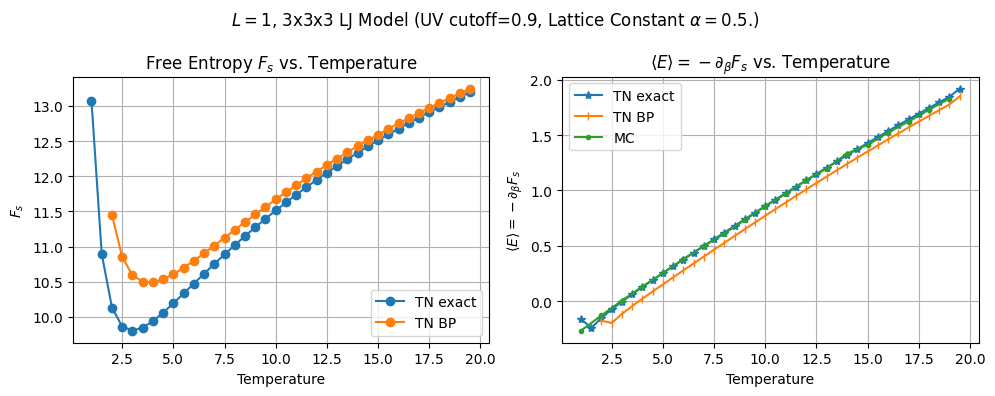

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

L=1
N_a=3

# TN BP

# Read from file
f = open(f"./3DLJ_occ_L={L}_N_a={N_a}_BP_cutoff_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T_tn_BP = []
Entropy_BP = []
M = []

for line in lines:
    if line.split(',')[1].split('=')[0] == ' Entropy ':
        Entropy_BP.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
        T_tn_BP.append(float(line.split(',')[0].split('=')[1]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_BP = np.array(T_tn_BP)
Entropy_BP = np.array(Entropy_BP)
dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
T_sq = T_tn_BP**2
numerical_E_BP = T_sq * dSdT / N_a**3

# TN BP spin basis
f = open(f"./3DLJ_L={L}_N_a={N_a}_BP_results.txt", "r")
lines = f.readlines()
f.close()

# Extract data
T_tn_BP_spin = []
Entropy_BP_spin = []

for line in lines:
    if line.split(',')[1].split('=')[0] == ' Entropy ':
        Entropy_BP_spin.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
        T_tn_BP_spin.append(float(line.split(',')[0].split('=')[1]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_BP_spin = np.array(T_tn_BP_spin)
Entropy_BP_spin = np.array(Entropy_BP_spin)
dSdT = scipy.gradient(Entropy_BP_spin, T_tn_BP_spin)
T_sq = T_tn_BP_spin**2
numerical_E_BP_spin = T_sq * dSdT / N_a**3


# MC

# Read from file
f = open(f"./MC/3DLJ_occ_L={L}_N_a={N_a}_cutoff_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T = []
E = []
M = []

for line in lines:
    if line.split('=')[0] == 'T':
        T.append(float(line.split('=')[1]))
    elif line.split(' ')[0] == 'Energy':
        E.append(float(line.split(' ')[-1]))
    elif line.split(' ')[0] == 'Total':
        M.append(float(line.split(' ')[-1]))

# TN Exact

# Read from file
f = open(f"./3DLJ_occ_L={L}_N_a={N_a}_Exact_cutoff_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T_tn_e = []
Entropy_e = []

for line in lines:
    if line.split(',')[1].split('=')[0] == ' Entropy ':
        Entropy_e.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
        T_tn_e.append(float(line.split(',')[0].split('=')[1]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_e = np.array(T_tn_e)
Entropy_e = np.array(Entropy_e)
dSdT = scipy.gradient(Entropy_e, T_tn_e)
T_sq = T_tn_e**2
numerical_E_e = T_sq * dSdT / N_a**3





# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(T_tn_e, Entropy_e, 'o-', label='TN exact')
ax[0].plot(T_tn_BP, Entropy_BP, 'o-', label='TN BP')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel(r'$F_s$')
ax[0].set_title(r'Free Entropy $F_s$ vs. Temperature')
ax[0].legend()

ax[1].plot(T_tn_e, numerical_E_e, '*-', label='TN exact')
ax[1].plot(T_tn_BP, numerical_E_BP, '|-', label='TN BP')
ax[1].plot(T, E, '.-', label='MC')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
ax[1].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. Temperature')
ax[1].legend()

ax[0].grid()
ax[1].grid()

# Add title
fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} LJ Model (UV cutoff=0.9, Lattice Constant $\alpha={L/(N_a-1)}$.)')

plt.tight_layout()
plt.show()


/tmp/ipykernel_366/4186747818.py:36: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
/tmp/ipykernel_366/4186747818.py:82: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_e, T_tn_e)


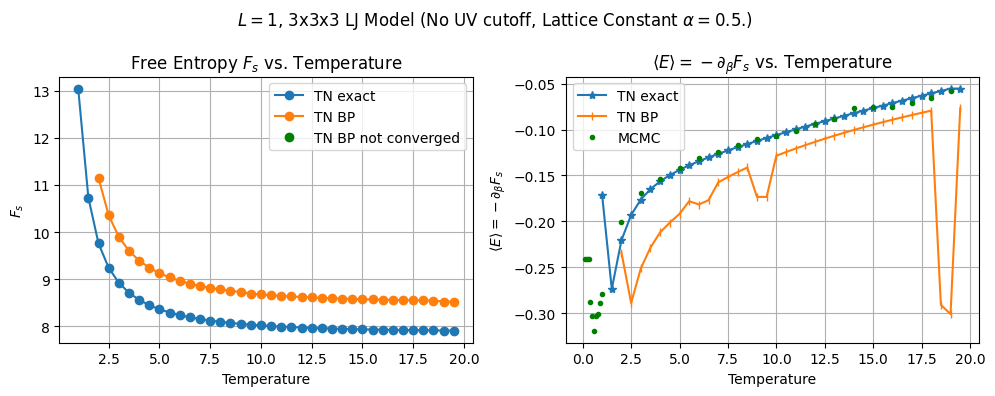

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

L=1
N_a=3

# TN BP

# Read from file
f = open(f"./3DLJ_occ_L={L}_N_a={N_a}_BP_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T_tn_BP = []
T_tn_BP_not_converged = []
Entropy_BP = []
Entropy_BP_not_converged = []

for line in lines:
    if line.split(',')[1].split('=')[0] == ' Entropy ':
        Entropy_BP.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
        T_tn_BP.append(float(line.split(',')[0].split('=')[1]))
    else:
        T_tn_BP.append(float(line.split(',')[0].split('=')[1]))
        Entropy_BP.append(float(line.split(',')[2].split('=')[1].split('\n')[0]))
        T_tn_BP_not_converged.append(float(line.split(',')[0].split('=')[1]))
        Entropy_BP_not_converged.append(float(line.split(',')[2].split('=')[1].split('\n')[0]))
        

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_BP = np.array(T_tn_BP)
Entropy_BP = np.array(Entropy_BP)
dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
T_sq = T_tn_BP**2
numerical_E_BP = T_sq * dSdT / N_a**3


# MC

# Read from file
f = open(f"./MC/3DLJ_occ_L={L}_N_a={N_a}_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T = []
E = []
M = []

for line in lines:
    if line.split('=')[0] == 'T':
        T.append(float(line.split('=')[1]))
    elif line.split(' ')[0] == 'Energy':
        E.append(float(line.split(' ')[-1]))
    elif line.split(' ')[0] == 'Total':
        M.append(float(line.split(' ')[-1]))

# TN Exact

# Read from file
f = open(f"./3DLJ_occ_L={L}_N_a={N_a}_Exact_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T_tn_e = []
Entropy_e = []

for line in lines:
    if line.split(',')[1].split('=')[0] == ' Entropy ':
        Entropy_e.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
        T_tn_e.append(float(line.split(',')[0].split('=')[1]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_e = np.array(T_tn_e)
Entropy_e = np.array(Entropy_e)
dSdT = scipy.gradient(Entropy_e, T_tn_e)
T_sq = T_tn_e**2
numerical_E_e = T_sq * dSdT / N_a**3





# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(T_tn_e, Entropy_e, 'o-', label='TN exact')
ax[0].plot(T_tn_BP, Entropy_BP, 'o-', label='TN BP')
ax[0].plot(T_tn_BP_not_converged, Entropy_BP_not_converged, 'o', color ='g',label='TN BP not converged')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel(r'$F_s$')
ax[0].set_title(r'Free Entropy $F_s$ vs. Temperature')
ax[0].legend()

ax[1].plot(T_tn_e, numerical_E_e, '*-', label='TN exact')
ax[1].plot(T_tn_BP, numerical_E_BP, '|-', label='TN BP')

ax[1].plot(T, E, '.', label='MCMC',color='g')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
ax[1].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. Temperature')
ax[1].legend()

ax[0].grid()
ax[1].grid()

# Add title
fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} LJ Model (No UV cutoff, Lattice Constant $\alpha={L/(N_a-1)}$.)')

plt.tight_layout()
plt.show()


/tmp/ipykernel_366/1123349773.py:36: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)


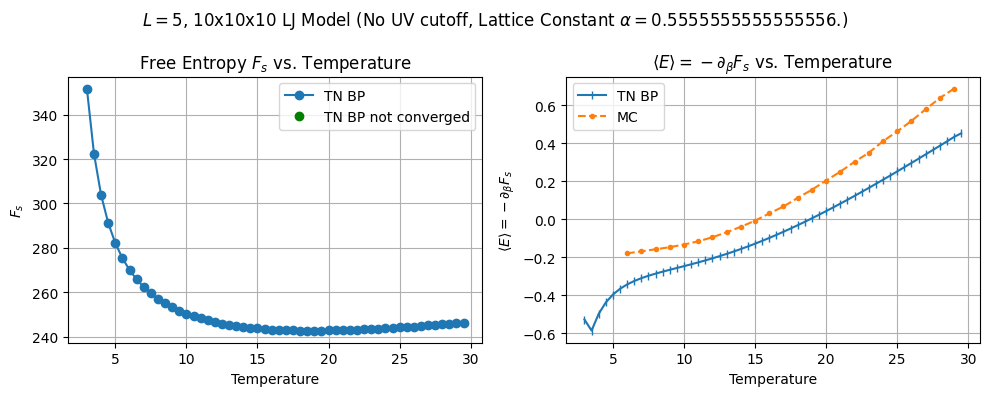

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

L=5
N_a=10

# TN BP

# Read from file
f = open(f"./3DLJ_occ_L={L}_N_a={N_a}_BP_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T_tn_BP = []
T_tn_BP_not_converged = []
Entropy_BP = []
Entropy_BP_not_converged = []

for line in lines:
    if line.split(',')[1].split('=')[0] == ' Entropy ':
        Entropy_BP.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
        T_tn_BP.append(float(line.split(',')[0].split('=')[1]))
    else:
        T_tn_BP.append(float(line.split(',')[0].split('=')[1]))
        Entropy_BP.append(float(line.split(',')[2].split('=')[1].split('\n')[0]))
        T_tn_BP_not_converged.append(float(line.split(',')[0].split('=')[1]))
        Entropy_BP_not_converged.append(float(line.split(',')[2].split('=')[1].split('\n')[0]))
        

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_BP = np.array(T_tn_BP)
Entropy_BP = np.array(Entropy_BP)
dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
T_sq = T_tn_BP**2
numerical_E_BP = T_sq * dSdT / N_a**3


# MC

# Read from file
f = open(f"./MC/3DLJ_occ_L={L}_N_a={N_a}_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T = []
E = []
M = []

for line in lines:
    if line.split('=')[0] == 'T':
        T.append(float(line.split('=')[1]))
    elif line.split(' ')[0] == 'Energy':
        E.append(float(line.split(' ')[-1]))
    elif line.split(' ')[0] == 'Total':
        M.append(float(line.split(' ')[-1]))

# # Spin basis results
# f0 = open(f"./MC/3DLJ_L={L}_N_a={N_a}_results.txt", "r")
# lines = f0.readlines()
# f0.close()

# T_spin = []
# E_spin = []

# for line in lines:
#     if line.split('=')[0] == 'T':
#         T_spin.append(float(line.split('=')[1]))
#     elif line.split(' ')[0] == 'Energy':
#         E_spin.append(float(line.split(' ')[-1]))

# # Compare with occupation number basis results

# zipped_T_E_spin = zip(T_spin, E_spin)
zipped_T_E = zip(T, E)

# T_spin, E_spin = zip(*sorted(zipped_T_E_spin))
T, E = zip(*sorted(zipped_T_E))

# T_spin = list(T_spin)
# E_spin = list(E_spin)
T = list(T)
E = list(E)




# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# ax[0].plot(T_tn_e, Entropy_e, 'o-', label='TN exact')
ax[0].plot(T_tn_BP, Entropy_BP, 'o-', label='TN BP')
ax[0].plot(T_tn_BP_not_converged, Entropy_BP_not_converged, 'o', color ='g',label='TN BP not converged')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel(r'$F_s$')
ax[0].set_title(r'Free Entropy $F_s$ vs. Temperature')
ax[0].legend()

# ax[1].plot(T_tn_e, numerical_E_e, '*-', label='TN exact')
ax[1].plot(T_tn_BP, numerical_E_BP, '|-', label='TN BP')
# ax[1].plot(T_spin, E_spin, '.-', label='MCMC spin basis',color='g')
ax[1].plot(T, E, '.--', label='MC')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
ax[1].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. Temperature')
ax[1].legend()

ax[0].grid()
ax[1].grid()

# Add title
fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} LJ Model (No UV cutoff, Lattice Constant $\alpha={L/(N_a-1)}$.)')

plt.tight_layout()
plt.show()


In [95]:
"""
T=0.01, Entropy = 1941682.4142318552, Converged=True, damping=0.004
T=0.05, Entropy = 335263.63953579473, Converged=True, damping=0.004
T=0.1, Entropy = 134463.9384719512, Converged=True, damping=0.004
T=0.4, Entropy = 4375.910083863756, Converged=True, damping=0.006
"""

'\nT=0.01, Entropy = 1941682.4142318552, Converged=True, damping=0.004\nT=0.05, Entropy = 335263.63953579473, Converged=True, damping=0.004\nT=0.1, Entropy = 134463.9384719512, Converged=True, damping=0.004\nT=0.4, Entropy = 4375.910083863756, Converged=True, damping=0.006\n'

/tmp/ipykernel_366/300955969.py:39: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)


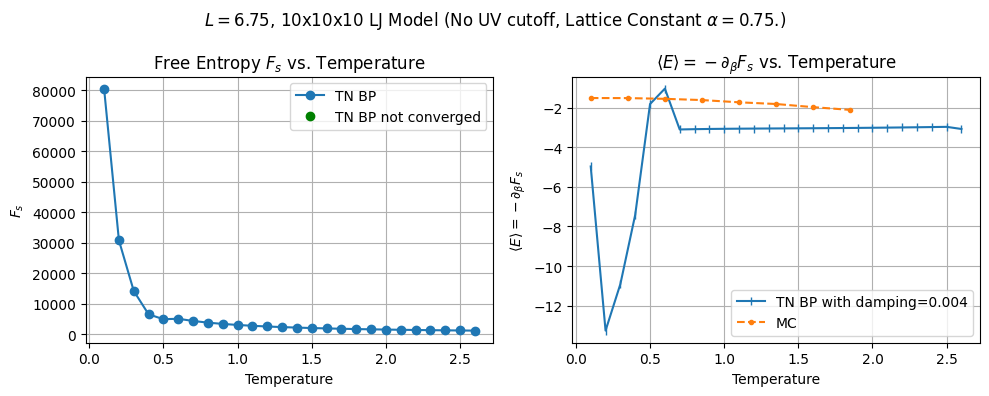

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.ndimage import gaussian_filter1d

L=6.75
N_a=10

# TN BP

# Read from file
f = open(f"./3DLJ_occ_L={L}_N_a={N_a}_BP_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T_tn_BP = []
T_tn_BP_not_converged = []
Entropy_BP = []
Entropy_BP_not_converged = []

for line in lines:
    if line.split(',')[1].split('=')[0] == ' Entropy ':
        Entropy_BP.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
        T_tn_BP.append(float(line.split(',')[0].split('=')[1]))
    else:
        T_tn_BP.append(float(line.split(',')[0].split('=')[1]))
        Entropy_BP.append(float(line.split(',')[2].split('=')[1].split('\n')[0]))
        T_tn_BP_not_converged.append(float(line.split(',')[0].split('=')[1]))
        Entropy_BP_not_converged.append(float(line.split(',')[2].split('=')[1].split('\n')[0]))
        

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_BP = np.array(T_tn_BP)
Entropy_BP = np.array(Entropy_BP)
# sigma = 2
# Entropy_BP = gaussian_filter1d(Entropy_BP, sigma)
dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
T_sq = T_tn_BP**2
numerical_E_BP = T_sq * dSdT / N_a**3


# MC

# Read from file
f = open(f"./MC/3DLJ_occ_L={L}_N_a={N_a}_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T = []
E = []
M = []

for line in lines:
    if line.split('=')[0] == 'T':
        T.append(float(line.split('=')[1]))
    elif line.split(' ')[0] == 'Energy':
        E.append(float(line.split(' ')[-1]))
    elif line.split(' ')[0] == 'Total':
        M.append(float(line.split(' ')[-1]))



# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# ax[0].plot(T_tn_e, Entropy_e, 'o-', label='TN exact')
ax[0].plot(T_tn_BP, Entropy_BP, 'o-', label='TN BP')
ax[0].plot(T_tn_BP_not_converged, Entropy_BP_not_converged, 'o', color ='g',label='TN BP not converged')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel(r'$F_s$')
ax[0].set_title(r'Free Entropy $F_s$ vs. Temperature')
ax[0].legend()

# ax[1].plot(T_tn_e, numerical_E_e, '*-', label='TN exact')
ax[1].plot(T_tn_BP, numerical_E_BP, '|-', label=f'TN BP with damping=0.004')

ax[1].plot(T, E, '.--', label='MC')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
ax[1].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. Temperature')
ax[1].legend()

ax[0].grid()
ax[1].grid()

# Add title
fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} LJ Model (No UV cutoff, Lattice Constant $\alpha={L/(N_a-1)}$.)')

plt.tight_layout()
plt.show()




T=2.7, Entropy = 1137.6051565837727, Converged=True, damping=0
T=2.8000000000000003, Entropy = 1098.759997802954, Converged=True, damping=0
T=2.9000000000000004, Entropy = 901.0483408124379, Converged=True, damping=0.001
T=3.0000000000000004, Entropy = 1029.3379516032535, Converged=True, damping=0
T=3.1, Entropy = 998.235978343751, Converged=True, damping=0
T=3.2, Entropy = 969.243784000318, Converged=True, damping=0
T=3.3000000000000003, Entropy = 942.172216597379, Converged=True, damping=0
T=3.4000000000000004, Entropy = 916.8539125144649, Converged=True, damping=0
T=3.5000000000000004, Entropy = 893.1402034481494, Converged=True, damping=0
T=3.6, Entropy = 870.898540056027, Converged=True, damping=0
T=3.7, Entropy = 850.0103341492409, Converged=True, damping=0
T=3.8000000000000003, Entropy = 830.3691420330672, Converged=True, damping=0
T=3.9000000000000004, Entropy = 811.8791275161907, Converged=True, damping=0
T=4.0, Entropy = 794.4537554546112, Converged=True, damping=0
T=4.1, Entropy = 778.0146763118087, Converged=True, damping=0
T=4.2, Entropy = 762.490769776185, Converged=True, damping=0
T=4.3, Entropy = 747.8173214519351, Converged=True, damping=0
T=4.3999999999999995, Entropy = 733.9353113714737, Converged=True, damping=0
T=4.5, Entropy = 720.7907968799171, Converged=True, damping=0
T=4.6, Entropy = 708.3343754887488, Converged=True, damping=0
T=4.7, Entropy = 696.5207157566491, Converged=True, damping=0
T=4.8, Entropy = 685.3081462518016, Converged=True, damping=0
T=4.9, Entropy = 674.6582942880848, Converged=True, damping=0
T=5.0, Entropy = 664.5357674552182, Converged=True, damping=0
T=5.1, Entropy = 654.9078720675955, Converged=True, damping=0
T=5.2, Entropy = 645.7443635595922, Converged=True, damping=0
T=5.3, Entropy = 637.0172246152785, Converged=True, damping=0
T=5.4, Entropy = 628.7004674391371, Converged=True, damping=0
T=5.5, Entropy = 620.7699571050517, Converged=True, damping=0